In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!unzip -qq /content/drive/"My Drive"/"[AOP:딥러닝 인공지능]"/TEST/"1. [Tensorflow 2.0 과 Pytorch]"/"3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch"/"3. dataset"/mnist_png.zip


In [11]:
data_paths = glob('/content/mnist_png/training/*/*.png')

In [17]:
data_paths.sort()

In [18]:
path = data_paths[0]
path

'/content/mnist_png/training/0/1.png'

## Load Image

In [19]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [20]:
image.shape

TensorShape([28, 28, 1])

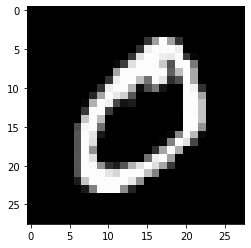

In [21]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
image.shape

TensorShape([28, 28, 1])

In [24]:
inputs = image[tf.newaxis, ...] #4차으로 늘리기

In [25]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
    ) # 데이터 제너레이터 : 모델에 데이터를 변형해가면서 넣는 어그멘테이션(확) 작업

In [26]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

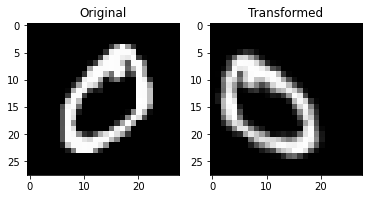

In [27]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed')
plt.imshow(np.squeeze(image), 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

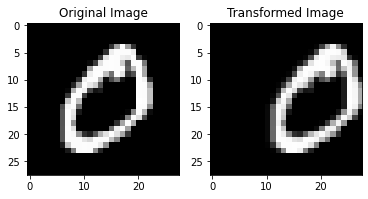

In [29]:
datagen = ImageDataGenerator(
    width_shift_range=0.3
)    

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

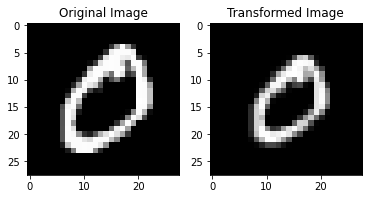

In [31]:
datagen = ImageDataGenerator(
    zoom_range=0.3
)    

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

## Rescale시 주의사항

In [32]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)